<a href="https://colab.research.google.com/github/erichsiao1106/lung_ct/blob/master/keras_unet_conv2dtranspose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm.auto import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.models import Model, load_model
from keras.layers import *
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [ ]:
# Unet with Conv2DTranspose
input_layer = Input(shape=x_train.shape[1:])
c1 = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
l = MaxPool2D(strides=(2,2))(c1)
c2 = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(l)
l = MaxPool2D(strides=(2,2))(c2)
c3 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(l)
l = MaxPool2D(strides=(2,2))(c3)
c4 = Conv2D(filters=32, kernel_size=(1,1), activation='relu', padding='same')(l)
l = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4), c3], axis=-1)
l = Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(l)
l = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(l), c2], axis=-1)
l = Conv2D(filters=24, kernel_size=(2,2), activation='relu', padding='same')(l)
l = concatenate([Conv2DTranspose(24, (2, 2), strides=(2, 2), padding='same')(l), c1], axis=-1)
l = Conv2D(filters=16, kernel_size=(2,2), activation='relu', padding='same')(l)
l = Conv2D(filters=64, kernel_size=(1,1), activation='relu')(l)
l = Dropout(0.5)(l)
output_layer = Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid')(l)
                                                         
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 8)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 16) 1168        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

## Evaluate

In [ ]:
model_final = load_model('drive/My Drive/class/北分署/week9/lung_ct/conv2dTranspose-18-0.13.h5', compile=False)

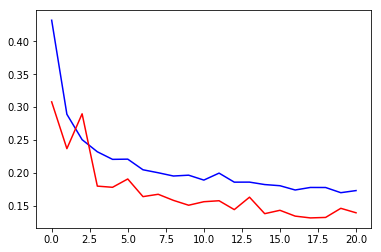

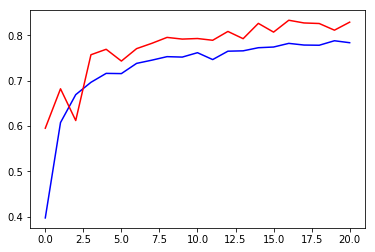

In [ ]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['dice_coef'], color='b')
plt.plot(hist.history['val_dice_coef'], color='r')
plt.show()

In [ ]:
idx = np.random.randint(x_val.shape[0])
print(idx)
img_test = x_val[idx]
mask_pred = model_final.predict(np.expand_dims(img_test, axis=0))
mask_pred = mask_pred.reshape((IMG_SIZE, IMG_SIZE))
plt.imshow(mask_pred, cmap='gray')

NameError: ignored

1


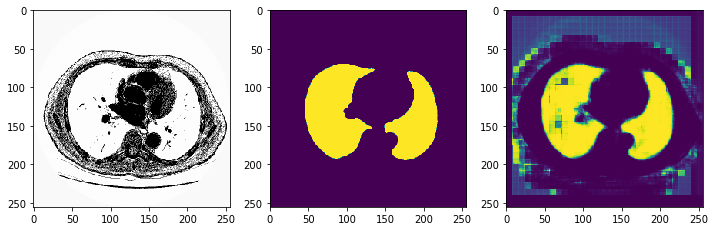

In [ ]:
idx = np.random.randint(x_val.shape[0])
print(idx)
y_hat = model_final.predict(x_val)
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(x_val[i,:,:,0], cmap='gray')
ax[1].imshow(y_val[i,:,:,0])
ax[2].imshow(y_hat[i,:,:,0])

A good result, but it probably helped that these images are very homogeneous.

1


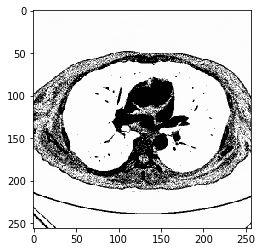

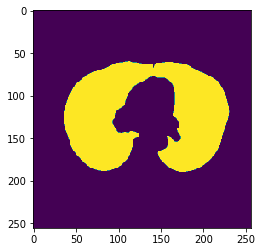

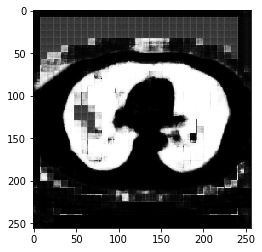

threshold: 0.1


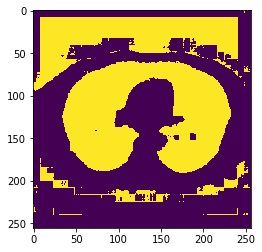

threshold: 0.2


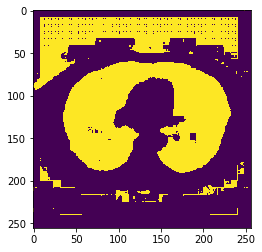

threshold: 0.30000000000000004


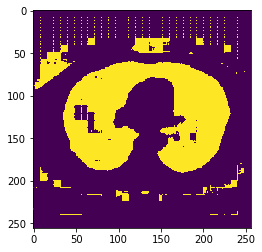

threshold: 0.4


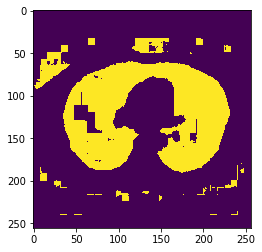

threshold: 0.5


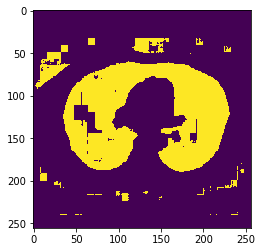

threshold: 0.6000000000000001


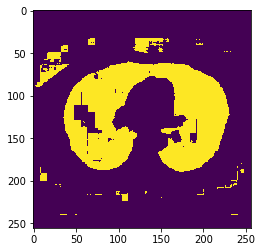

threshold: 0.7000000000000001


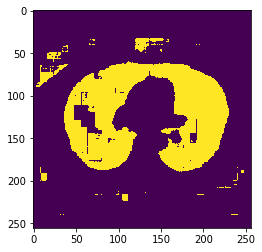

threshold: 0.8


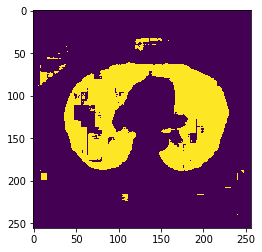

threshold: 0.9


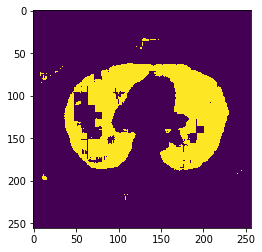

In [ ]:
# Different threshold
idx = np.random.randint(x_val.shape[0])
print(idx)
# input img
plt.imshow(x_val[idx].reshape((IMG_SIZE, IMG_SIZE)), cmap='gray')
plt.show()
# ground truth
plt.imshow(y_val[idx].reshape((IMG_SIZE, IMG_SIZE)))
plt.show()
# prediction
img_test = x_val[idx]
mask_pred = model_final.predict(np.expand_dims(img_test, axis=0))
mask_pred = mask_pred.reshape((IMG_SIZE, IMG_SIZE))
plt.imshow(mask_pred, cmap='gray')
plt.show()
# prediction with different threshold
for i in range(1,10):
    threshold = 0.1 * i
    print(f'threshold: {threshold}')
    mask_threshold = mask_pred.copy()
    mask_threshold[mask_threshold >= threshold] = 1
    mask_threshold[mask_threshold < threshold] = 0
    plt.imshow(mask_threshold)
    plt.show()